In [4]:
!pip install pprint

ERROR: Could not find a version that satisfies the requirement pprint (from versions: none)
ERROR: No matching distribution found for pprint

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
from scipy.io import wavfile

In [6]:
# create the signal 
duration = 10  # seconds
wav_raw_data = wavfile.read("output/Hayloft_II_output.wav")
fs = wav_raw_data[0]  # sample frequency in Hz
signal = wav_raw_data[1] / 2 ** 15  # normalize to [-1, 1]
signal.shape

(9481500,)

In [7]:
# Split the signal into chunks
chunk_size = int(fs // 2.5)  # 1 second chunks
num_chunks = len(signal) // chunk_size
print("num_chunks", num_chunks)
chunks = np.array(np.split(signal[:num_chunks * chunk_size], num_chunks))

num_chunks 537


In [8]:
pprint(chunks)
chunks.shape


array([[ 0.        ,  0.        ,  0.        , ..., -0.12390137,
        -0.12417603, -0.12454224],
       [-0.12493896, -0.1192627 , -0.11346436, ..., -0.06390381,
        -0.05834961, -0.05239868],
       [-0.05187988, -0.04489136, -0.03768921, ...,  0.25112915,
         0.25720215,  0.2616272 ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])


(537, 17640)

In [9]:
# Compute the FFT for each chunk
fft_chunks = np.array([np.fft.fft(chunk) for chunk in chunks])
fft_chunks.shape

(537, 17640)

In [10]:
# Compute the frequencies for the x-axis
frequencies = np.fft.fftfreq(chunk_size, 1 / fs)
frequencies

array([ 0. ,  2.5,  5. , ..., -7.5, -5. , -2.5])

In [11]:
# find the dominant frequency
dominant_frequencies = np.abs(fft_chunks)[0].argmax()
dominant_frequencies


44

(537, 8820)


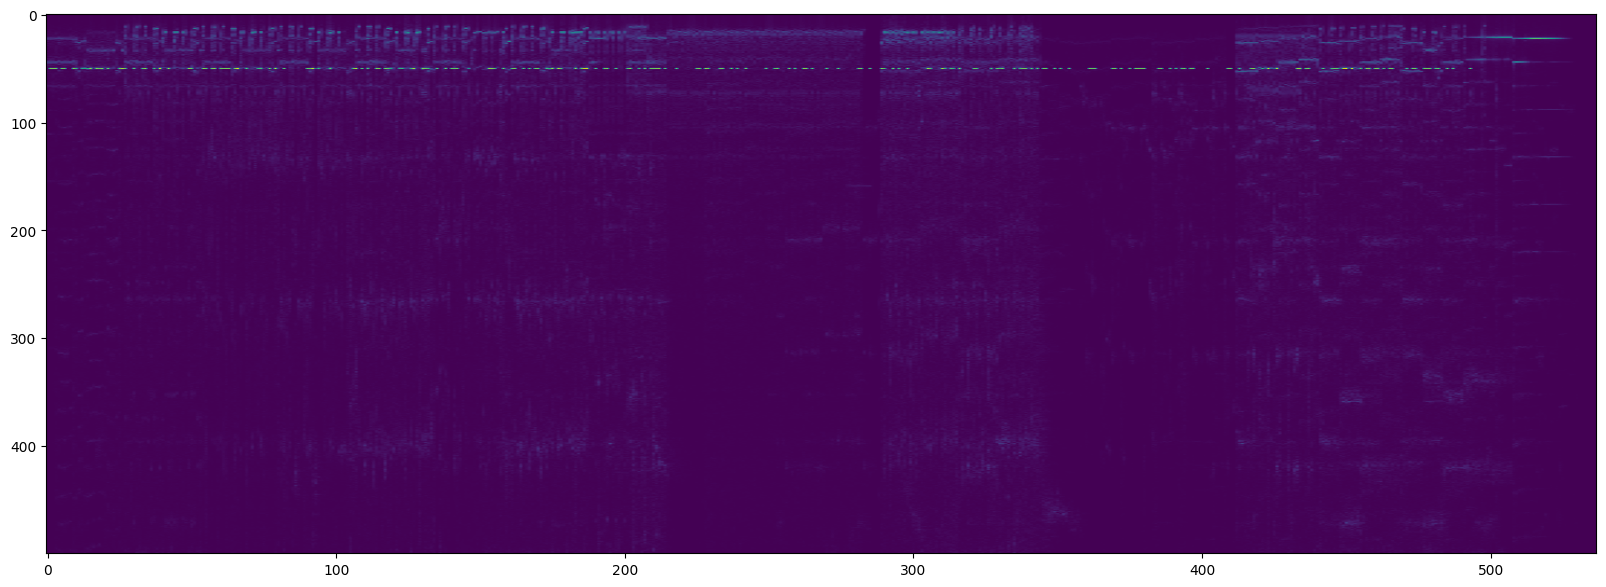

In [22]:
fft_mags = np.abs(fft_chunks)
fft_mags = np.array([fft_mag[:len(fft_mag) // 2] for fft_mag in fft_mags])
print(fft_mags.shape)
frequencies_chunk = frequencies[:len(frequencies) // 2]
fft_mags = fft_mags.T
fig = plt.figure(figsize=(20, 7))
plt.imshow(fft_mags[0:500, :], aspect='auto')


# decode the code

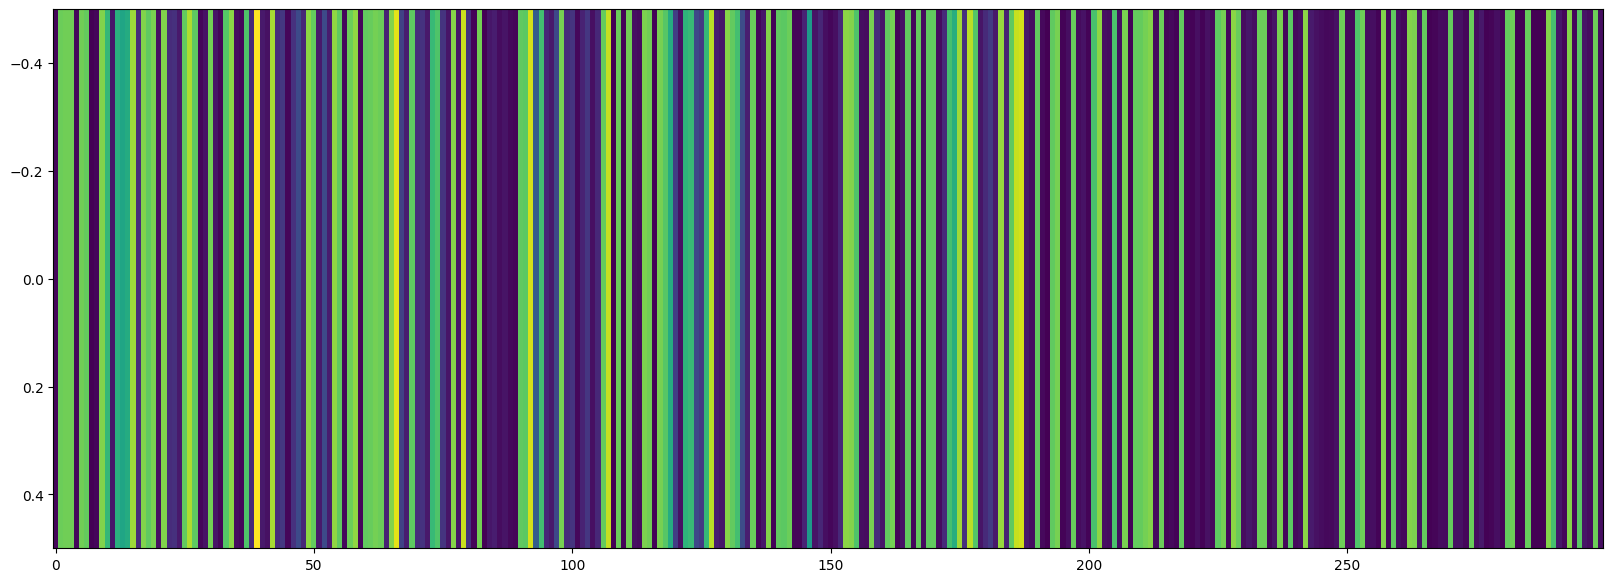

In [13]:
fig = plt.figure(figsize=(20, 7))
plt.imshow(fft_mags[50:51, :300], aspect='auto')

In [14]:
fft_mags[50:51, :]

array([[6.65889834e+01, 2.96651126e+03, 2.99547744e+03, 2.99283422e+03,
        8.68232505e+01, 2.98469063e+03, 2.91601131e+03, 3.28031588e+01,
        7.09196054e+01, 3.09951038e+03, 2.54065126e+03, 2.33033176e+02,
        2.42801160e+03, 2.25138329e+03, 2.35683189e+03, 3.26115880e+03,
        4.66565580e+02, 3.09137937e+03, 2.89086830e+03, 3.05115406e+03,
        1.59528054e+02, 3.09250328e+03, 4.94963122e+02, 5.29527940e+02,
        2.60473638e+02, 2.90865383e+03, 3.34747338e+03, 2.87777562e+03,
        7.08090962e+01, 1.90388121e+02, 3.00532936e+03, 2.08019948e+02,
        4.97535920e+01, 2.80939712e+03, 3.15296623e+03, 1.24998755e+02,
        7.03665749e+01, 2.77458797e+03, 4.60008218e+02, 3.81805674e+03,
        2.70611628e+02, 1.74700328e+02, 3.31388406e+03, 4.90265373e+02,
        6.16989994e+02, 7.00915013e+01, 5.54257187e+02, 8.53751708e+02,
        4.31833996e+02, 3.16949744e+03, 2.91403729e+03, 2.70318052e+02,
        8.58751903e+02, 2.95889194e+02, 3.17779102e+03, 2.888287

In [15]:
binary = np.where(fft_mags[50:51, :] > 1000, 1, 0)

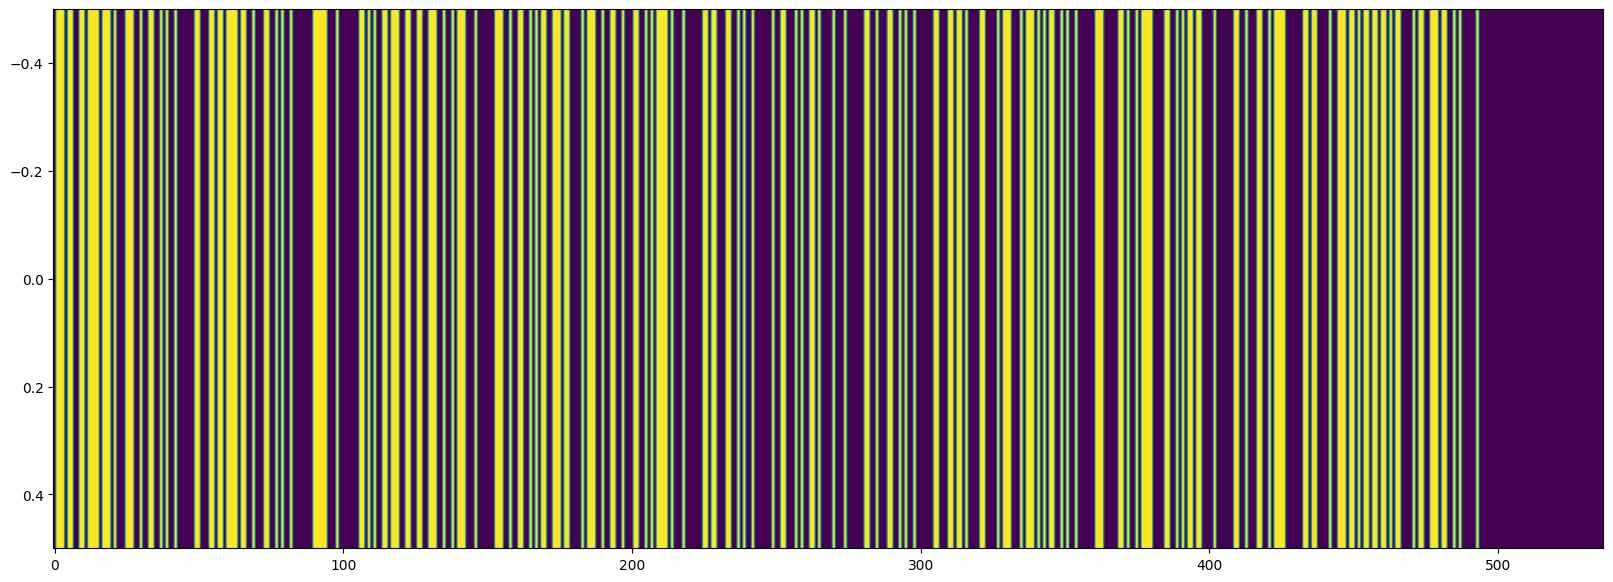

In [16]:
fig = plt.figure(figsize=(20, 7))
plt.imshow(binary, aspect='auto')


In [17]:
binary = list(binary[0])
binary

[0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [18]:
binary = "".join([str(bit) for bit in binary])
binary

'011101100110111101110100011100100110010100100000011000110110111101100100011001010010000000111110001000000011010100110111001100110011100100101110001000000111001001100101011001110110000101110010011001000110010101111010001000000110110001100101001000000100110001010011010000100010000001100100011001010010000001100011011010000110000101110001011101010110010100100000011100000110100101111000011001010110110000100000011001000110010111100000011011000010011101101011011011010110000101100111011001010000010000000000000000000000000000000000000000000'

In [19]:
message = ""
for i in range(len(binary) // 8):
    byte: str = binary[i * 8: (i + 1) * 8]
    message += chr(int(byte, 2))
message

"votre code > 5739. regardez le LSB de chaque pixel deàl'kmage\x04\x00\x00\x00\x00\x00"

In [20]:
help(int)

Help on class int in module builtins:

class int(object)
 |  int([x]) -> integer
 |  int(x, base=10) -> integer
 |
 |  Convert a number or string to an integer, or return 0 if no arguments
 |  are given.  If x is a number, return x.__int__().  For floating point
 |  numbers, this truncates towards zero.
 |
 |  If x is not a number or if base is given, then x must be a string,
 |  bytes, or bytearray instance representing an integer literal in the
 |  given base.  The literal can be preceded by '+' or '-' and be surrounded
 |  by whitespace.  The base defaults to 10.  Valid bases are 0 and 2-36.
 |  Base 0 means to interpret the base from the string as an integer literal.
 |  >>> int('0b100', base=0)
 |  4
 |
 |  Built-in subclasses:
 |      bool
 |
 |  Methods defined here:
 |
 |  __abs__(self, /)
 |      abs(self)
 |
 |  __add__(self, value, /)
 |      Return self+value.
 |
 |  __and__(self, value, /)
 |      Return self&value.
 |
 |  __bool__(self, /)
 |      True if self else False
